In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv("Shill_Bidding_Dataset.csv")

In [3]:
#checking table structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [4]:
#checking descriptitve statistics of the dataset
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [1]:
#checking the number of rows and columns
df.shape

In [9]:
#viewing the first 5 rows
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [10]:
#checking for null values
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

In [12]:
#checking the count of each subclass in the Class variable
df.Class.value_counts()

7     2427
3     1408
1     1289
5     1060
10     137
Name: Auction_Duration, dtype: int64

In [14]:
#determining class feature and predictors
X = df.iloc[:,[1,3,4,5,6,7,8,9,10,11]].values
y = df.iloc[:,12].values

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\JOHN_EKWERE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


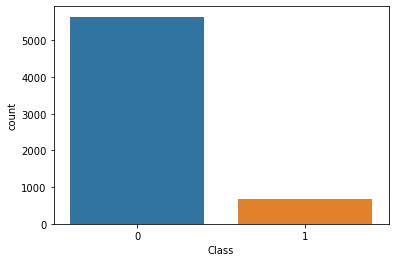

None
0    5646
1     675
Name: Class, dtype: int64


In [16]:
#plot of Class variable to check if the data is balanced
sns.countplot(df.Class)
print(plt.show())
print(df.Class.value_counts())

In [17]:
#splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 99)

<AxesSubplot:ylabel='count'>

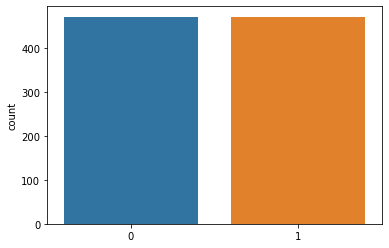

In [19]:
#balancing the dataset using RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train, y_train = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train)

In [20]:
#scaling the features
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [21]:
#building the neural network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,activation='relu',input_shape=(10,)))
model.add(tf.keras.layers.Dense(9,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 9)                 144       
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [24]:
#training the model
history = model.fit(X_train_s, y_train, batch_size = 8, epochs= 20, verbose=2,  validation_split=0.2)

Epoch 1/20
95/95 - 2s - loss: 0.5879 - accuracy: 0.7338 - val_loss: 0.6371 - val_accuracy: 0.6825 - 2s/epoch - 21ms/step
Epoch 2/20
95/95 - 0s - loss: 0.3343 - accuracy: 0.9113 - val_loss: 0.2875 - val_accuracy: 0.9259 - 315ms/epoch - 3ms/step
Epoch 3/20
95/95 - 0s - loss: 0.1554 - accuracy: 0.9682 - val_loss: 0.1735 - val_accuracy: 0.9471 - 272ms/epoch - 3ms/step
Epoch 4/20
95/95 - 0s - loss: 0.0939 - accuracy: 0.9762 - val_loss: 0.1081 - val_accuracy: 0.9577 - 265ms/epoch - 3ms/step
Epoch 5/20
95/95 - 0s - loss: 0.0696 - accuracy: 0.9815 - val_loss: 0.0940 - val_accuracy: 0.9577 - 232ms/epoch - 2ms/step
Epoch 6/20
95/95 - 0s - loss: 0.0573 - accuracy: 0.9854 - val_loss: 0.0711 - val_accuracy: 0.9841 - 268ms/epoch - 3ms/step
Epoch 7/20
95/95 - 0s - loss: 0.0504 - accuracy: 0.9907 - val_loss: 0.0601 - val_accuracy: 0.9841 - 228ms/epoch - 2ms/step
Epoch 8/20
95/95 - 0s - loss: 0.0453 - accuracy: 0.9907 - val_loss: 0.0456 - val_accuracy: 0.9894 - 230ms/epoch - 2ms/step
Epoch 9/20
95/95 -

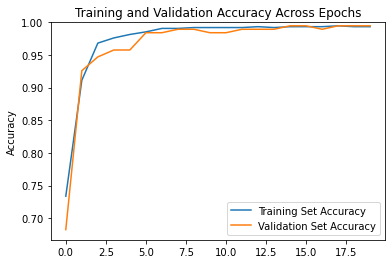

In [25]:
#plotting the accuracy
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

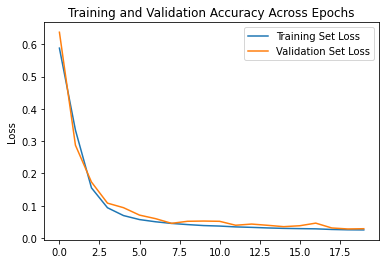

In [26]:
#plotting the loss function
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [27]:
y_pred = model.predict(X_test_s) > 0.2

60/60 [==============================] - 0s 1ms/step


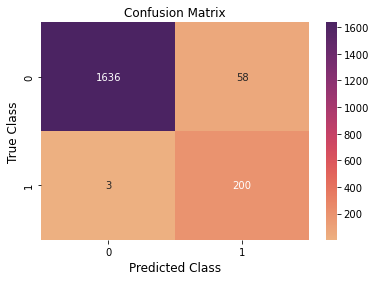

In [28]:
#evaluating model performance
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [29]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [30]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


In [31]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix')
print(cm,'\n\n')
print('------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.97


Confusion Matrix
[[1636   58]
 [   3  200]] 


------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1694
           1       0.78      0.99      0.87       203

    accuracy                           0.97      1897
   macro avg       0.89      0.98      0.92      1897
weighted avg       0.97      0.97      0.97      1897

